In [1]:
import matplotlib
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
%matplotlib inline

In [2]:
data=pd.read_csv("SAT20.csv")

In [3]:
data.head(10)

id  fl_dur  fw_pk  l_fw_pkt  l_bw_pkt  pkt_len_min  pkt_len_max  \
0   1       1      2         0         0            0            0   
1   2       1      2         0         0            0            0   
2   3       0      2         0         0            0            0   
3   4       1      2         0         0            0            0   
4   5       1      2         0         0            0            0   
5   6      80      2         0         0            0            0   
6   7       1      2         0         0            0            0   
7   8       1      2         0         0            0            0   
8   9       1      2         0         0            0            0   
9  10      47      2         0         0            0            0   

   pkt_len_std  fl_byt_s  fl_iat_min    ...     down_up_ratio  fw_byt_blk_avg  \
0          0.0       0.0           1    ...                 0               0   
1          0.0       0.0           1    ...                 0               0   
2          0.0       0.0           0    ...                 0               0   
3          0.0       0.0           1    ...                 0               0   
4          0.0       0.0           1    ...                 0               0   
5          0.0       0.0           0    ...                 1               0   
6          0.0       0.0           1    ...                 0               0   
7          0.0       0.0           1    ...                 0               0   
8          0.0       0.0           1    ...                 0               0   
9          0.0       0.0          47    ...                 0               0   

   fw_pkt_blk_avg  fw_blk_rate_avg  bw_byt_blk_avg  bw_pkt_blk_avg  \
0               0                0               0               0   
1               0                0               0               0   
2               0                0               0               0   
3               0                0               0               0   
4               0                0               0               0   
5               0                0               0               0   
6               0                0               0               0   
7               0                0               0               0   
8               0                0               0               0   
9               0                0               0               0   

   bw_blk_rate_avg  fw_win_byt  bw_win_byt     Label  
0                0        5840          -1  Syn_DDoS  
1                0        5840          -1  Syn_DDoS  
2                0        5840          -1  Syn_DDoS  
3                0        5840          -1  Syn_DDoS  
4                0        5840          -1  Syn_DDoS  
5                0        5840           0  Syn_DDoS  
6                0        5840          -1  Syn_DDoS  
7                0        5840          -1  Syn_DDoS  
8                0        5840          -1  Syn_DDoS  
9                0        5840          -1  Syn_DDoS  

[10 rows x 32 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82320 entries, 0 to 82319
Data columns (total 32 columns):
id                 82320 non-null int64
fl_dur             82320 non-null int64
fw_pk              82320 non-null int64
l_fw_pkt           82320 non-null int64
l_bw_pkt           82320 non-null int64
pkt_len_min        82320 non-null int64
pkt_len_max        82320 non-null int64
pkt_len_std        82320 non-null float64
fl_byt_s           82320 non-null float64
fl_iat_min         82320 non-null int64
bw_iat_tot         82320 non-null int64
bw_iat_min         82320 non-null int64
bw_psh_flag        82320 non-null int64
fw_urg_flag        82320 non-null int64
bw_urg_flag        82320 non-null int64
fw_hdr_len         82320 non-null int64
bw_pkt_s           82320 non-null float64
fin_cnt            82320 non-null int64
syn_cnt            82320 non-null int64
psh_cnt            82320 non-null int64
urg_cnt            82320 non-null int64
ece_cnt            82320 non-null int64
down_

Text(0, 0.5, 'Values count')

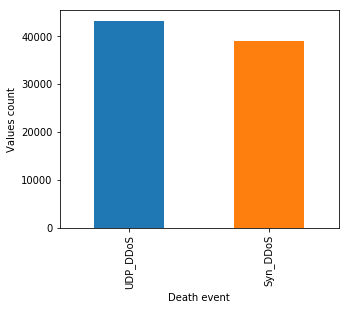

In [4]:
# multiple line plot
fig, ax = plt.subplots(figsize=(5,4))
#plt.rcParams['axes.labelweight'] = 'bold'
data['Label']= data[' Label']
data.Label.value_counts().plot(kind = 'bar',ax=ax)
plt.xlabel('Death event')
plt.ylabel('Values count')
#plt.savefig('nationality1.pdf')

In [5]:
#All Feature
from sklearn.preprocessing import LabelEncoder
drop_column=['Label',' Label']
X = data.drop(drop_column, axis=1)

#yoy = data['Event']
y = data['Label']
y = LabelEncoder().fit_transform(y)

In [14]:
#removing ID column too
from sklearn.preprocessing import LabelEncoder
drop_column=['Label',' Label', 'id']
X = data.drop(drop_column, axis=1)

#yoy = data['Event']
y = data['Label']
y = LabelEncoder().fit_transform(y)

In [20]:
#removing less significant columns
from sklearn.preprocessing import LabelEncoder
drop_column=[' Label','Label','id', 'syn_cnt','psh_cnt', 'urg_cnt', 'ece_cnt','fw_byt_blk_avg', 'fw_pkt_blk_avg', 'fw_blk_rate_avg',
       'bw_byt_blk_avg', 'bw_pkt_blk_avg', 'bw_blk_rate_avg','bw_psh_flag', 'fw_urg_flag', 'bw_urg_flag','pkt_len_std']
X = data.drop(drop_column, axis=1)

#yoy = data['Event']
y = data['Label']
y = LabelEncoder().fit_transform(y)

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

Random Forest
99.99595076125688


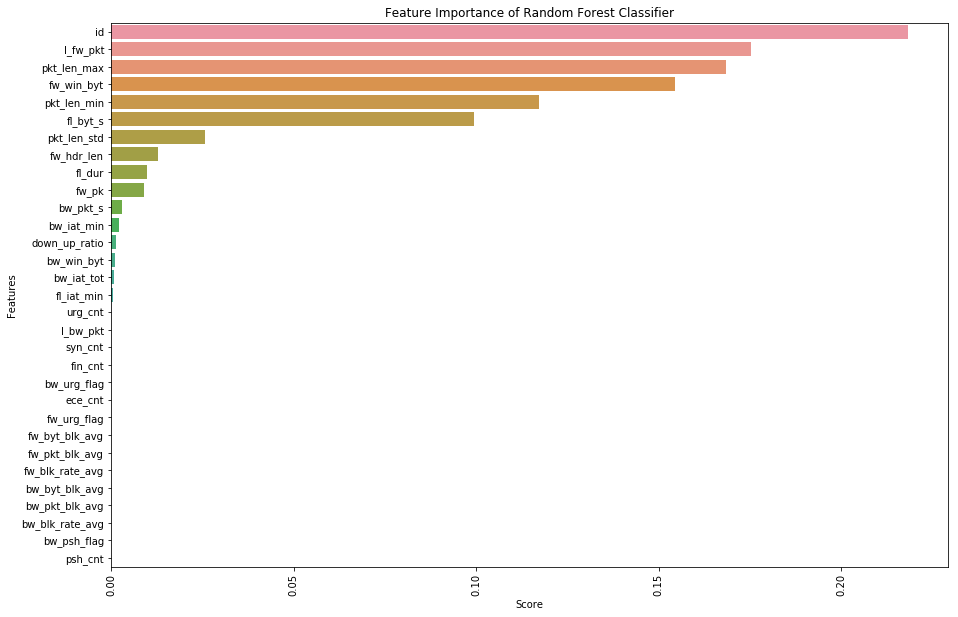

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#All Features
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('All Features.pdf')
plt.show()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


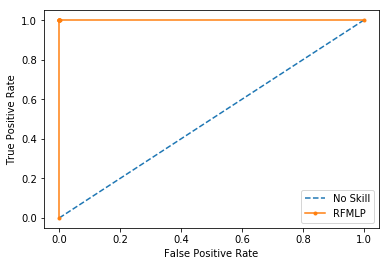

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = rfc.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFMLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.savefig('ROC.pdf')
pyplot.savefig('ROC.JPG')
pyplot.show()

In [15]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, pred)

0.9999188148257151

In [24]:
#KDD
alpha = 0.05
first_test =[99.99, 99.99, 100.00, 99.99]
second_test=[98.94,98.99,99.21,98.65]

In [28]:
#NSL
alpha = 0.05
first_test =[99.99, 99.99, 99.99, 99.99]
second_test=[99.83,99.62,99.82,99.72]

In [30]:
#STIN
alpha = 0.05
first_test =[96.24,94.28,98.67,96.47]
second_test=[87.75,89.98,91.02,90.50]

In [31]:
#KDD
from scipy import stats

t_value,p_value=stats.ttest_rel(first_test,second_test)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that the performance is improved by proposed model. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the performance is not improved by proposed model. i.e., d = 0 at %.2f level of significance.'''%alpha)

Test statistic is 7.105395
p-value for one_tailed_test is 0.002868
Conclusion n Since p-value(=0.002868) < alpha(=0.05) We reject the null hypothesis H0. 

So we conclude that the performance is improved by proposed model. i.e., d = 0 at 0.05 level of significance.


In [9]:
rfc.feature_importances_

array([2.18359961e-01, 9.95954352e-03, 8.93893110e-03, 1.75285967e-01,
       8.37274257e-06, 1.17233223e-01, 1.68358240e-01, 2.57666461e-02,
       9.95365683e-02, 4.78343380e-04, 8.03730848e-04, 2.20393001e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29788123e-02,
       3.06639189e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.14493182e-05, 0.00000000e+00, 1.47951922e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.54357920e-01, 1.17244969e-03])

In [10]:
data.columns

Index(['id', 'fl_dur', 'fw_pk', 'l_fw_pkt', 'l_bw_pkt', 'pkt_len_min',
       'pkt_len_max', 'pkt_len_std', 'fl_byt_s', 'fl_iat_min', 'bw_iat_tot',
       'bw_iat_min', 'bw_psh_flag', 'fw_urg_flag', 'bw_urg_flag', 'fw_hdr_len',
       'bw_pkt_s', 'fin_cnt', 'syn_cnt', 'psh_cnt', 'urg_cnt', 'ece_cnt',
       'down_up_ratio', 'fw_byt_blk_avg', 'fw_pkt_blk_avg', 'fw_blk_rate_avg',
       'bw_byt_blk_avg', 'bw_pkt_blk_avg', 'bw_blk_rate_avg', 'fw_win_byt',
       'bw_win_byt', ' Label', 'Label'],
      dtype='object')

In [36]:
score=[0.02049801, 0.0376158 , 0.03523146, 0.01533165, 0.0360122 ,
       0.01610212, 0.05275264, 0.01366314, 0.03161356, 0.15209729,
       0.19167799, 0.13677685, 0.08701766, 0.04242982, 0.02321972,
       0.1079601 ]
Chi_score=[3.845744324227531e-08,2.2782875738407628e-06,1.3131734018296024e-06,0.13485423396446766,0.048341443266402634,0.3079536942594841,0.0033248220968402657,0.02286743669274219,4.59970336036713e-18,1.5442296971798973e-21,0.0012026967714810885,9.885400678203716e-50,9.885400678203716e-50,1.0623054954920904e-15,1.7556791541055556e-17,9.885400678203716e-50]
labels=['Gender', 'Nationality', 'Place of birth', 'Stage id','Grade id','Section id', 'Topic', 'Semester','Relation', 'Raised hands','Visited resources', 'Announcements view','Discussion','Parent answering survey', 'Parent school satisfaction','Student absence days' ]

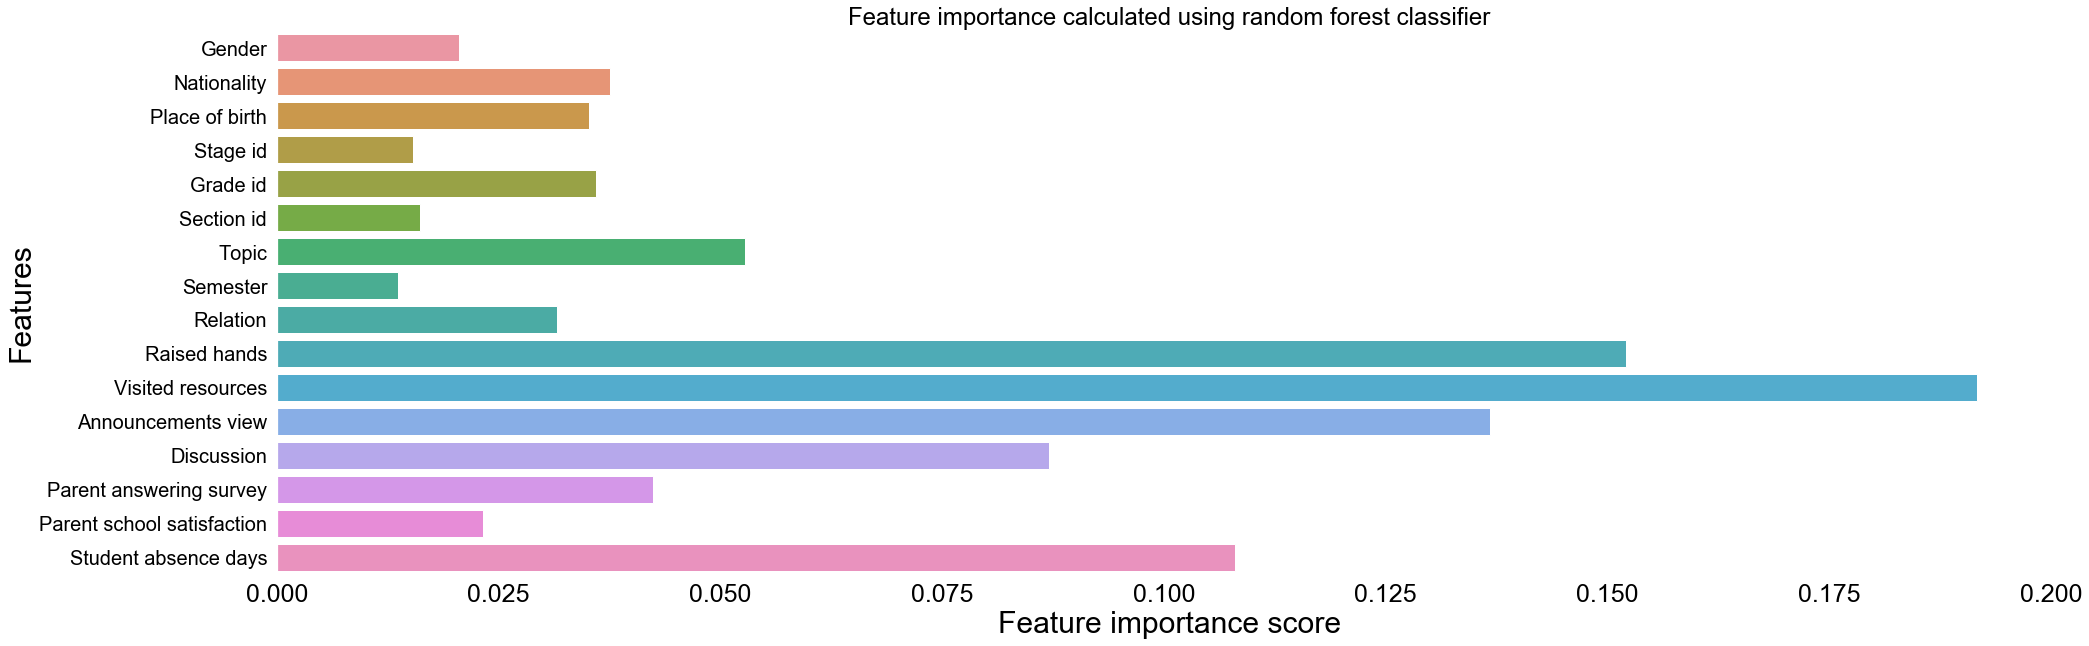

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(32.0, 10.0),
            'xtick.labelsize':25,
            'axes.titlesize' : 24,
            'font.size':20,
            'ytick.labelsize':20})
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=score, y=labels)
ax.set(xlabel='Feature importance score', ylabel='Features')
ax.set_title("Feature importance calculated using random forest classifier")
ax.get_figure().savefig('fig_5.png')

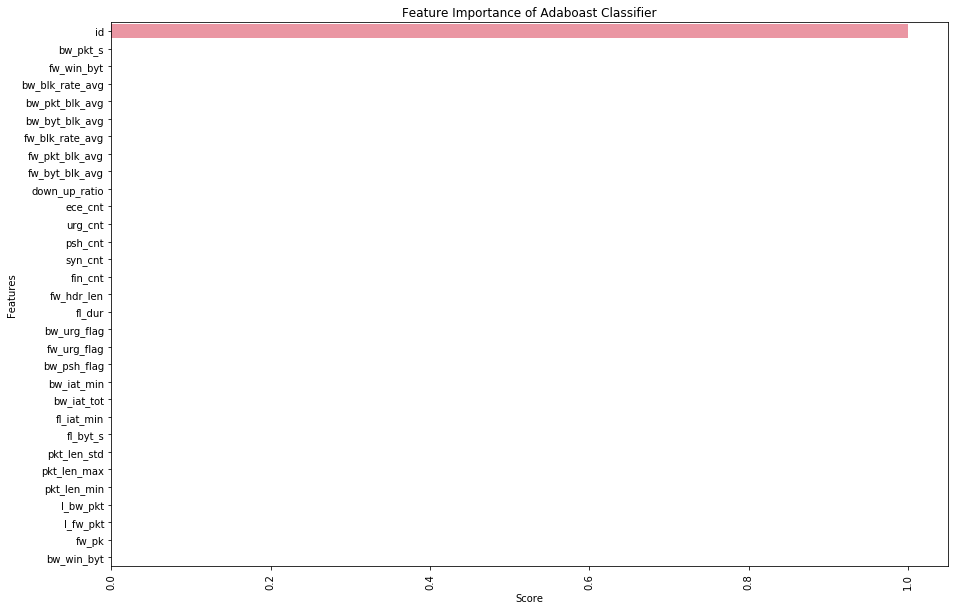

In [13]:
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Adaboast Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('All Features XGB.pdf')
plt.show()

In [11]:
#All models using All Features
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))

from sklearn.naive_bayes import GaussianNB
print("Gaussian NB")
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=52)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('ETC', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.9999595076125688
Decision Tree Classifier Result
0.9999595076125688
ETC
0.9999190152251377
Gaussian NB
0.7210479429867185
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.35766925817946227
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.762917071590541


In [12]:
#All Features
print("DT")
print(classification_report(y_test,DecisionTree))
print("GNB")
print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11730
           1       1.00      1.00      1.00     12966

    accuracy                           1.00     24696
   macro avg       1.00      1.00      1.00     24696
weighted avg       1.00      1.00      1.00     24696

GNB
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     11730
           1       1.00      0.47      0.64     12966

    accuracy                           0.72     24696
   macro avg       0.81      0.73      0.71     24696
weighted avg       0.82      0.72      0.70     24696

ETC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11730
           1       1.00      1.00      1.00     12966

    accuracy                           1.00     24696
   macro avg       1.00      1.00      1.00     24696
weighted avg       1.00      1.00      1.00     24696

RFC
    

Random Forest
99.97975380628442


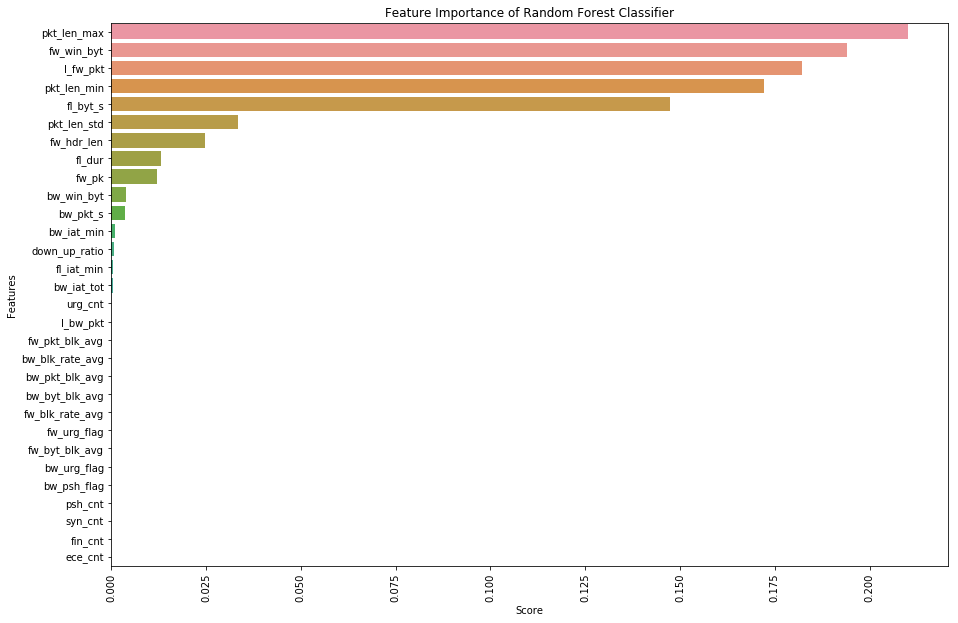

In [16]:
#Removing Id Featur
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Removing ID Feature.pdf')
plt.show()


In [17]:
#Removing ID Feature
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))

from sklearn.naive_bayes import GaussianNB
print("Gaussian NB")
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=52)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('ETC', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.9998380304502753
Decision Tree Classifier Result
0.9998785228377065
ETC
0.9997975380628442
Gaussian NB
0.720683511499838
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.7625931324910917
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.762674117265954


In [18]:
#Removing ID Feature
print("DT")
print(classification_report(y_test,DecisionTree))
print("GNB")
print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11730
           1       1.00      1.00      1.00     12966

    accuracy                           1.00     24696
   macro avg       1.00      1.00      1.00     24696
weighted avg       1.00      1.00      1.00     24696

GNB
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     11730
           1       1.00      0.47      0.64     12966

    accuracy                           0.72     24696
   macro avg       0.81      0.73      0.71     24696
weighted avg       0.82      0.72      0.70     24696

ETC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11730
           1       1.00      1.00      1.00     12966

    accuracy                           1.00     24696
   macro avg       1.00      1.00      1.00     24696
weighted avg       1.00      1.00      1.00     24696

RFC
    

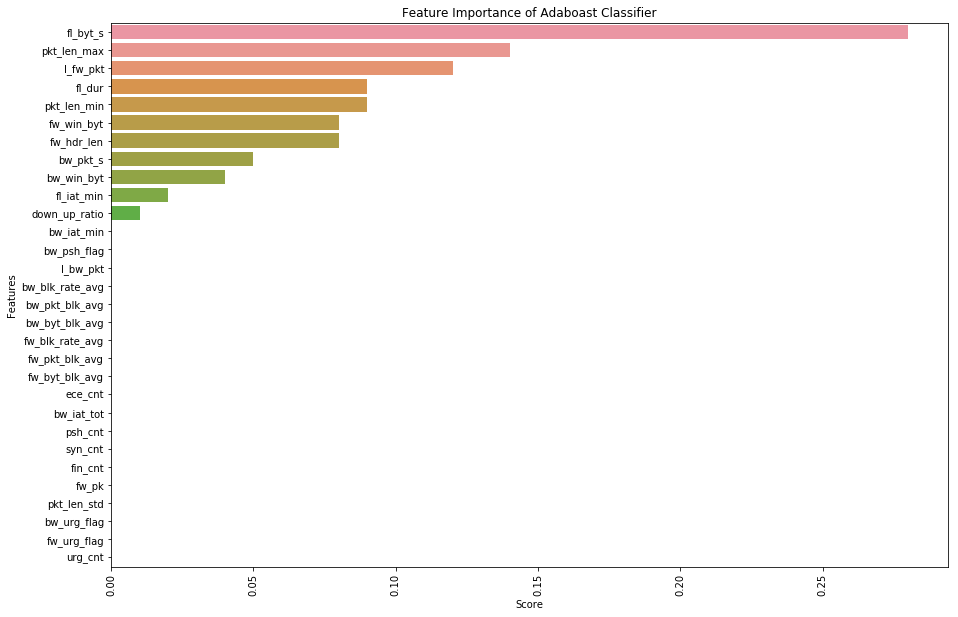

In [19]:
#Removing ID Feature
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Adaboast Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Remiving ID Features XGB.pdf')
plt.show()

Random Forest
99.98380304502753


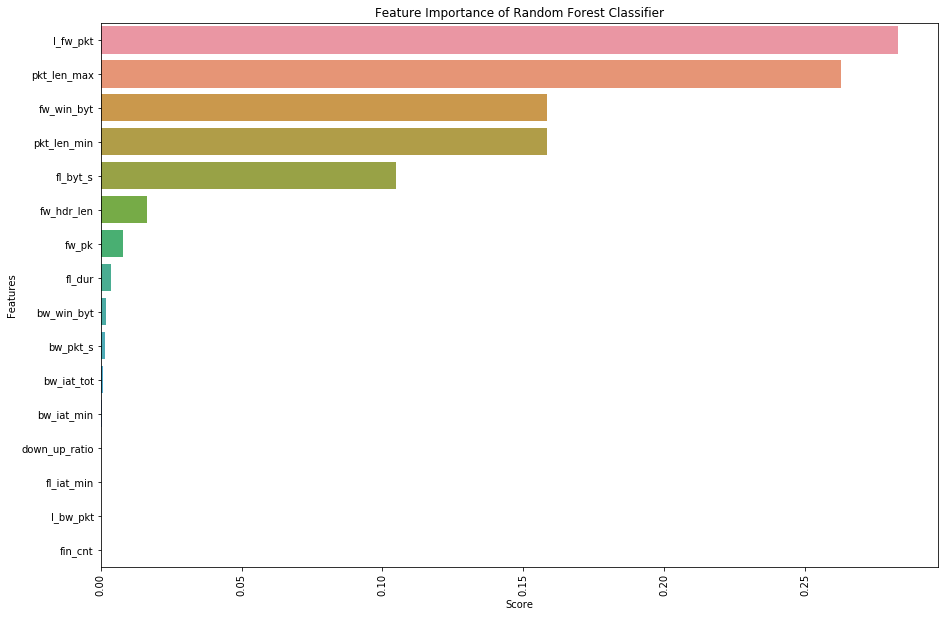

In [22]:
#Removing less significant Features
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Removing less significant Feature.pdf')
plt.show()


In [23]:
#Removing less significant Feature
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))

from sklearn.naive_bayes import GaussianNB
print("Gaussian NB")
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=52)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('ETC', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.9998380304502753
Decision Tree Classifier Result
0.9999190152251377
ETC
0.9998380304502753
Gaussian NB
0.720683511499838
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.7625931324910917
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.762674117265954


In [24]:
#Removing less significant Feature
print("DT")
print(classification_report(y_test,DecisionTree))
print("GNB")
print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11730
           1       1.00      1.00      1.00     12966

    accuracy                           1.00     24696
   macro avg       1.00      1.00      1.00     24696
weighted avg       1.00      1.00      1.00     24696

GNB
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     11730
           1       1.00      0.47      0.64     12966

    accuracy                           0.72     24696
   macro avg       0.81      0.73      0.71     24696
weighted avg       0.82      0.72      0.70     24696

ETC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11730
           1       1.00      1.00      1.00     12966

    accuracy                           1.00     24696
   macro avg       1.00      1.00      1.00     24696
weighted avg       1.00      1.00      1.00     24696

RFC
    

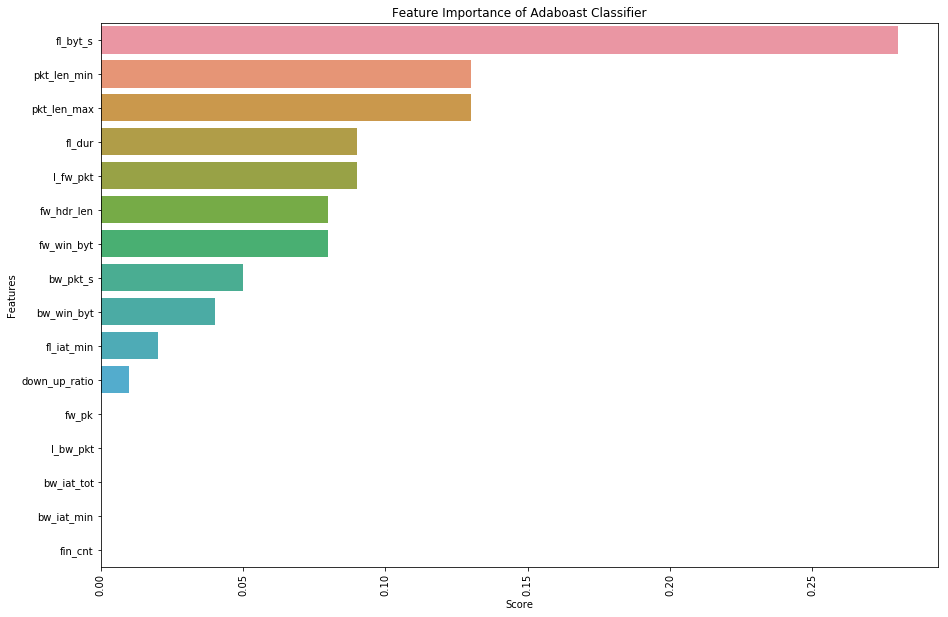

In [25]:
#Removing less significant Feature
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Adaboast Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Removing less significant Features XGB.pdf')
plt.show()